# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [37]:
# Import of Packages
# import math
# import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Functions File
import Functions as fn

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [38]:
# Reading the excel file and set it as a Dataframe
df = pd.read_excel("Sample.xlsx")

## Creating Scenarios based on Historic Data
Calculation of Driftrate Mu and Standart Deviation Sigma with Historic Data


In [39]:
# Assign Variables with a specific Vector of the Dataframe
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
# Percentage Change excluding the Outliners
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


### (Inputs) Definition for Scenarios 

In [40]:
# Demand at t0
# Dt0 = 22561132
Dt0 = Historic_Demand[-1]
# Steptime in Years
dt = 1
# Time Horizon of Forecasts in Steptime
Fth = 20
# Number of Forecasts
Forecasts = 100

Creating a Defined Number of Forecasts and Plotting them

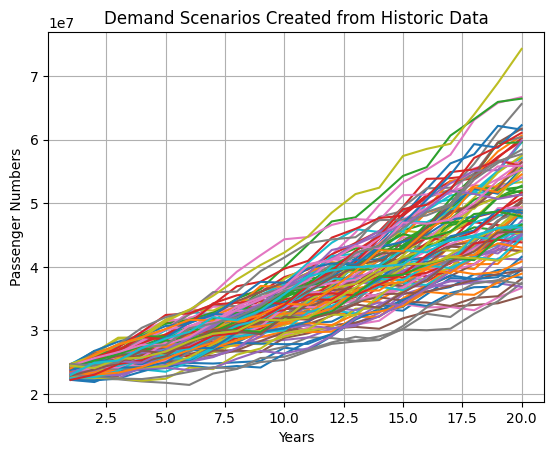

<Figure size 640x480 with 0 Axes>

In [41]:
# Calling the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)
# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, True, "Demand Scenarios Created from Historic Data")

# Assinging the Scenario as Demand
D = Scenario
# Rounding the Demand for further Calculations
D_rounded = np.ceil(D / 1000000)

## Exporting Data
Mainly used for Programming and Cross Checking with Excel

In [42]:
# Add initial Value for the Export
df_export = np.hstack((Dt0 * np.ones((D.shape[0], 1)), D))
# Change the shape to an Pandas Data Frame
df_export_2 = pd.DataFrame(df_export)
# Define Export File Name (if not found in Files a new one is created)
excel_file = "output.xlsx"
# Fill the Data Frame into the Excel File
df_export_2.to_excel(excel_file, index=False)

Mean Demand Vector (for Visualisation)

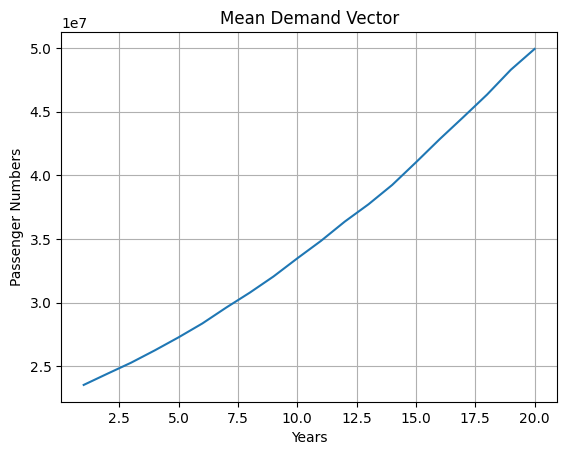

<Figure size 640x480 with 0 Axes>

In [43]:
# Calculating a Mean Scenario for the Estimation of the Capacity Vector
mean_demand_vector = np.mean(Scenario, axis=0)

# Plotting the Mean Sceanrio as Capacity Vector
fn.Scenario_plot(mean_demand_vector, Fth, True, "Mean Demand Vector")
# Plotting the Demand (For Visual Comparison with the Mean Capacity Vector)
# fn.Scenario_plot(Scenario, Fth, True, "Demand Scenarios Created from Historic Data")

## Calculation of the Traditional NPV and ENPV

### (Inputs) NPV Calculation Definiton (these are set as Standart Inputs in Function)

In [44]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

### (Input) Definition of a Capacity Vector

In [45]:
# Defined Capacity Vector in the Excel Sheet -> To compare results
K_rounded = np.array(
    [25, 25, 25, 25, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50]
)

Calling the NPV Calculation Function for Comparsion with the Excel Sheet

In [46]:
# Calling the NPV Calculatio Function to compare with Excel
Traditional_NPV = fn.NPV_Calculation(D_rounded, K_rounded, Fth, dt)
print("Traditional NPVs = ", Traditional_NPV)

Traditional NPVs =  [ 7013192.01550353  9731389.5695415  10793022.9948116   8522607.7120281
  9269722.68813225  7275300.62673601  7452913.20148131  6187086.54938859
  9822011.39427615 11142350.21207186  9736256.99987405  8824808.74311561
 11257567.12083765 10424673.41977645  7479865.33408532  6912612.98864157
 12439609.47971026 10132918.3356509  10382252.59288467  9772987.8538191
  7679691.4017362   7910754.21524063 11264269.75879261 10127277.4948141
  9709432.16187746  8540754.83130504  9229824.89762441 11945635.64101038
 11176084.26868882  8997077.94135318 11204002.91821634 10899190.66978488
 10474594.59090794 12327528.2410411   9194469.93166568  9815832.89385771
 11885309.01109454  5501911.81858875  8243082.68702607 11272245.48268291
  6686139.72017688  8328882.48357031 13028957.71575725 11050258.03870287
  7840648.53609645  7793640.58213865 10356744.67318587  9070828.48034348
 10943526.9525863  11884717.64787692 10367159.27506353 11868267.94878932
 11331980.30794263  8977541.181409

Calculating the ENPV for Comparsion with the Excel Sheet

In [47]:
# Calculating the ENPV for the Excel Capacity Vector
Traditional_ENPV = np.mean(Traditional_NPV)
print("Traditional ENPV = ", Traditional_ENPV)

Traditional ENPV =  9868048.906124419


## Creating a Flexible Capacity Vector

In [48]:
# Initial Capacity
# K0 = 25
K0 = K_rounded[0]
# Capacity Increase in the Excel Sheet
theta_excel = 5
# Calling the Decision Rule for Excel Function to Create a Flexible Capacity Vector
Flexible_Capacity_Excel = fn.Decision_Rule_Excel(D_rounded, K0, theta_excel)

In [49]:
# Capacity Theta Vector for Increase of Capacity
theta_flex = [2, 5, 8, 10]
# Capacity Difference Vector for Comparison  of Capacity
deltaK = [2, 5, 8]

# Calling the Decision Rule Function to Create a Flexible Capacity Vector
Flexible_Capacity = fn.Decision_Rule(D_rounded, K0, theta_flex, deltaK)

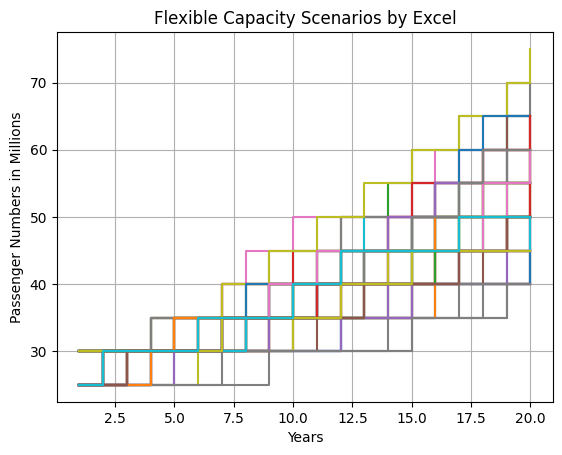

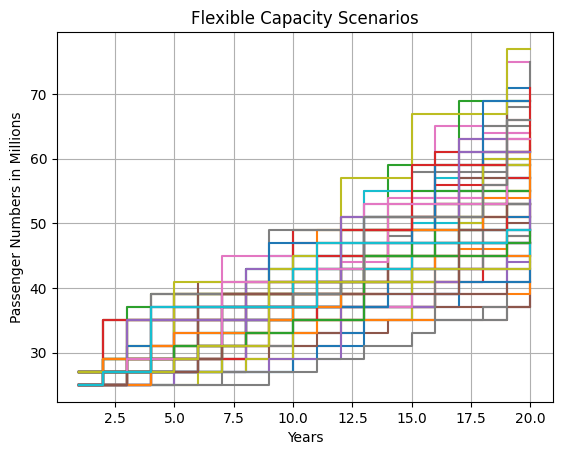

<Figure size 640x480 with 0 Axes>

In [50]:
# Plotting the Flexible Capacity Vectors
fn.Scenario_plot(
    Flexible_Capacity_Excel,
    Fth,
    False,
    "Flexible Capacity Scenarios by Excel",
    "Passenger Numbers in Millions",
)

fn.Scenario_plot(
    Flexible_Capacity,
    Fth,
    False,
    "Flexible Capacity Scenarios",
    "Passenger Numbers in Millions",
)

## Calculation of NPV and ENPV using the Flexible Capacity Vector

In [51]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_excel = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity_Excel, Fth, dt)
print("Flexible Excel NPVs = ", Flex_NPV_excel)

# Calculating the ENPV for the Flexible Excel Capacity Vector
Flex_ENPV_excel = np.average(Flex_NPV_excel)
print("Flexible Excel ENPV = ", Flex_ENPV_excel)

Flexible Excel NPVs =  [ 8108653.08076724  9406783.76963548 10238837.85374711  8845756.68877464
  9328840.8243668   8266241.05697289  8107515.34918805  7887601.75865865
  9604790.64021547 10618278.33950126  9473976.84070005  9158007.02669286
 10534948.80274838  9616676.62650863  8748659.3068985   8069022.8217415
 11540088.35325211  9731897.02547514  9805278.08846761  9546968.88986652
  8325138.78667378  8322937.51866035 10361647.46213336  9740823.54914561
  9557714.38481231  8924624.85164331  9318634.10214633 10853360.06021501
 10382559.78046316  9226517.42276397 10497591.77552305 10060653.9990302
  9820461.82746445 11015855.46563757  9112271.72413799  9658608.96565782
 10934937.85090831  7695631.8182993   8812282.68230711 10765997.32595198
  8053659.52041701  8770898.58870973 11753277.60404701 10336685.203864
  8616607.36684405  8405151.28216331  9916163.41010622  9081331.72339572
 10319392.54496101 10780731.02720377  9897706.75792048 10897497.51844034
 10228339.18184264  9052239.7857

In [52]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_est = fn.Flex_NPV_Calculation(D_rounded, Flexible_Capacity, Fth, dt)
print("Estimated Flexible Excel NPVs = ", Flex_NPV_est)

# Calculating the ENPV for the Estimated Flexible Capacity Vector
Flex_ENPV_est = np.average(Flex_NPV_est)
print("Estimated Flexible ENPV = ", Flex_ENPV_est)

Estimated Flexible Excel NPVs =  [ 8020901.4027195   9681345.6305637   9774140.56772421  8786293.74302539
  8100483.37807068  7610684.48579932  7856791.98803895  6843497.56591655
  9613710.75903495 10088481.71952924  9206308.96506616  8716838.26706857
 10462035.92210182  9778539.10956014  7526629.33935553  8576315.85739092
 10768724.53197601  9669698.15033123  9573147.67016978  9189201.21126099
  8412480.78953336  8035152.40333116  9929607.84847188  9512734.78520502
  9332793.83127895  8498849.21508302  8474453.14282606 10328077.5756786
 10086866.11406905  8639692.72961486 10162759.13097406  9429628.75621063
  9468547.15285061 10826887.79185713  8776303.9422636   9471798.85427995
 10288851.40101712  7111990.94755954  7824792.46894765 10041443.51114677
  8178646.58440994  8567530.61478843 11412988.2122447  10081447.25907567
  8725561.49376439  9116425.44571688  9290678.78286899  9007325.75615358
  9875249.04016987 10661442.72111557  9335959.9443227  10535300.3349755
  9822121.09128039  

Calculating the new ENPV

In [53]:
print("Traditional ENPV = ", Traditional_ENPV)
print("Flexible ENPV with Excel = ", Flex_ENPV_excel)
print("Flexible ENPV = ", Flex_ENPV_est)
print("If > 0 => Flexible Excel better -> ", Flex_ENPV_excel / Traditional_ENPV)
print("If > 0 => Flexible better -> ", Flex_ENPV_est / Traditional_ENPV)

Traditional ENPV =  9868048.906124419
Flexible ENPV with Excel =  9654600.701808827
Flexible ENPV =  9379486.521137532
If > 0 => Flexible Excel better ->  0.9783697662682722
If > 0 => Flexible better ->  0.9504904779420307


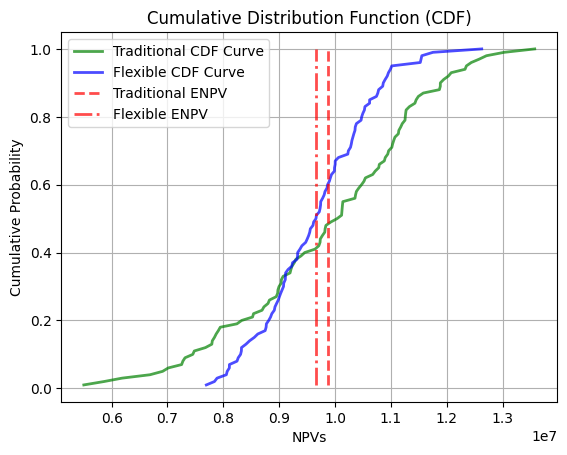

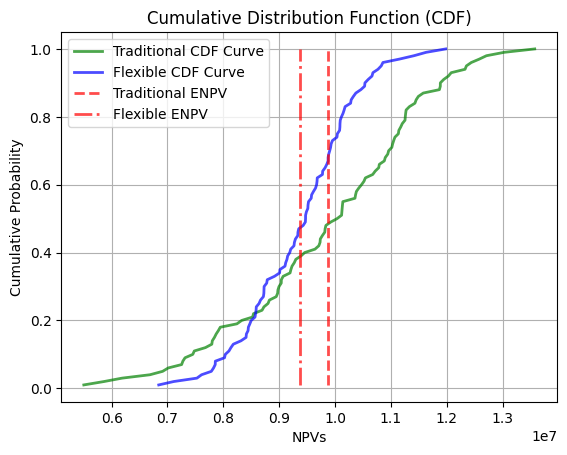

In [54]:
x1_excel = Traditional_NPV
x2_excel = Flex_NPV_excel
fn.CDF_Plot(x1_excel, x2_excel)

x1 = Traditional_NPV
x2 = Flex_NPV_est
fn.CDF_Plot(x1, x2)